<a href="https://colab.research.google.com/github/kr7/udm/blob/main/udm_polinomialis_regresszio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import widgets

In [ ]:
# Adatok
x0 = np.array([  10,  12,  29,   42,   49,   51 ])
y0 = np.array([ 425, 350, 870, 2350, 2510, 2600 ])

x0_test = np.array( [  8,  25,   55])
y0_test = np.array( [105, 650, 3000])

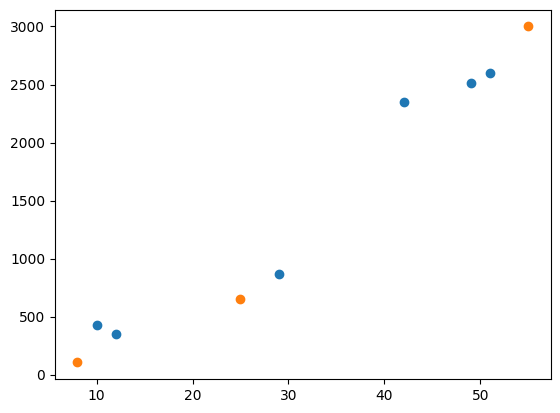

In [ ]:
plt.scatter(x0, y0)
plt.scatter(x0_test, y0_test)
plt.show()

In [ ]:
def transform_value(x, p):
  x_t = []
  for i in range(0, p+1):
    x_t.append(x**i)
  return x_t

def transform(xs, p):
  xs_t = []
  for x in xs:
    xs_t.append(transform_value(x, p))
  return np.array(xs_t)

In [ ]:
def train(x0, y, p, epochs=1000, eps=1e-5, output=-1):
  x = transform(x0, p)

  w = np.zeros( len(x[0]) )
  for i in range(epochs):
    grad = np.zeros( len(x[0]) )
    for j in range(len(x)):
      pred = 0
      for k in range(len(x[0])):
        pred = pred + w[k]*x[j][k]
      for k in range(len(x[0])):
        grad[k] = grad[k] + 2*x[j][k]*(pred-y[j])
    grad = grad/len(x) # Elemenkenti osztas!
    w = w - eps * grad # Elemenkénti szorzás ill. kivonás!

    if output!=-1 and i%output==0:
      print(f"{i:3} {w}")

  return w

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

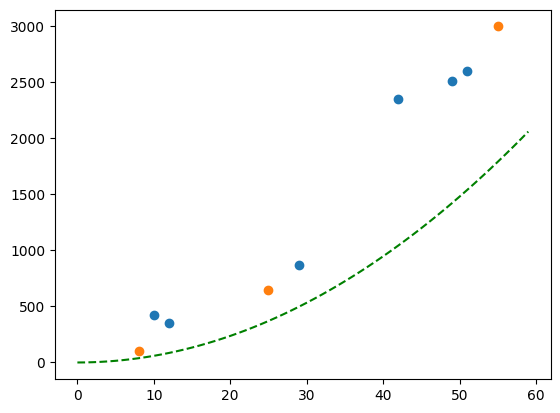

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

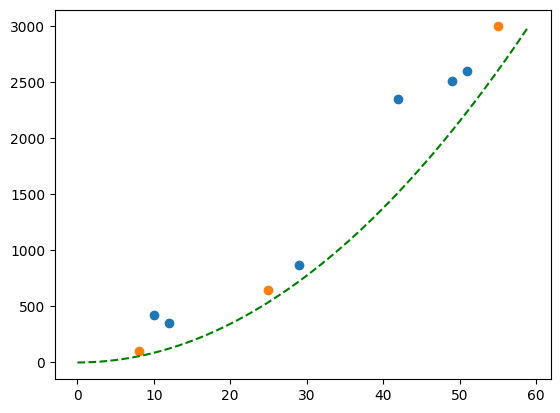

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

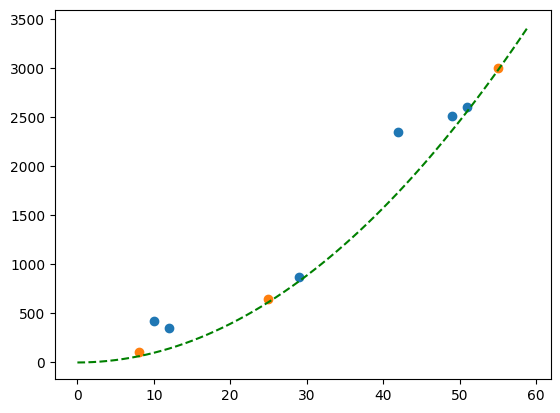

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

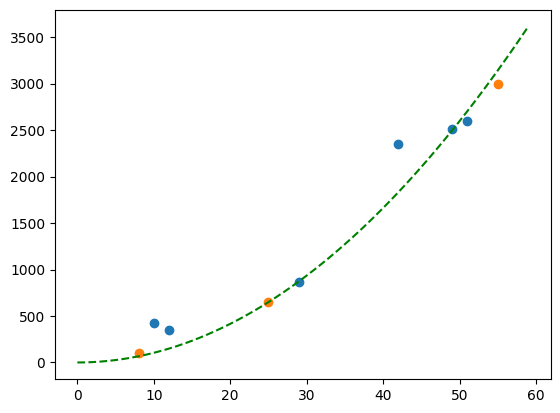

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

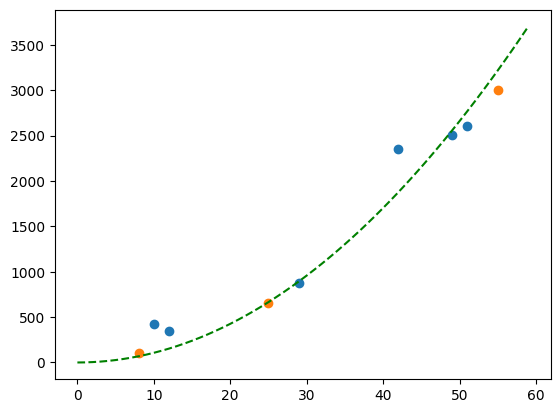

<IPython.core.display.Javascript object>

In [ ]:
tb = widgets.TabBar([str((i+1)*1) for i in range(5)], location='top')

for i in range(5):
  with tb.output_to(i):
    w = train(x0, y0, 2, (i+1), 1e-7)
    x_est = []
    y_est = []
    for x in range(60):
      x_est.append(x)
      y_est.append(transform_value(x, 2)@w)

    plt.plot(x_est, y_est, 'g--')
    plt.scatter(x0, y0)
    plt.scatter(x0_test, y0_test)

    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

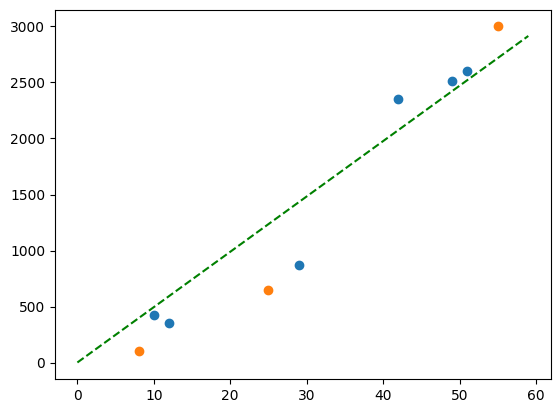

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

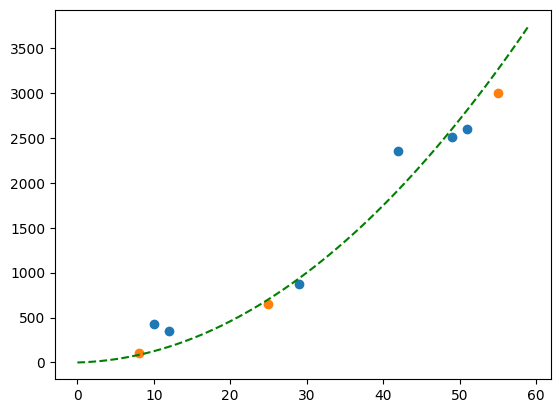

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

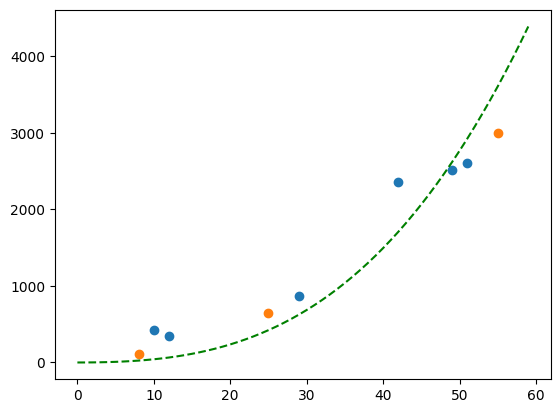

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

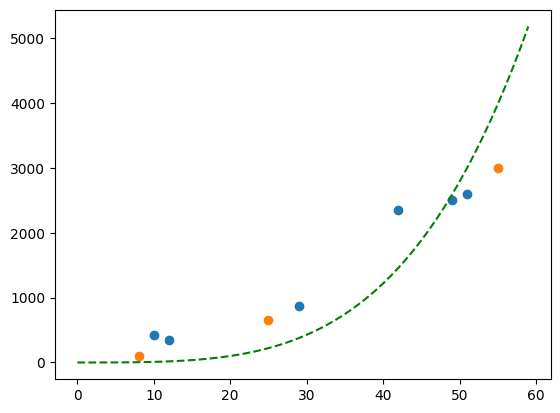

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

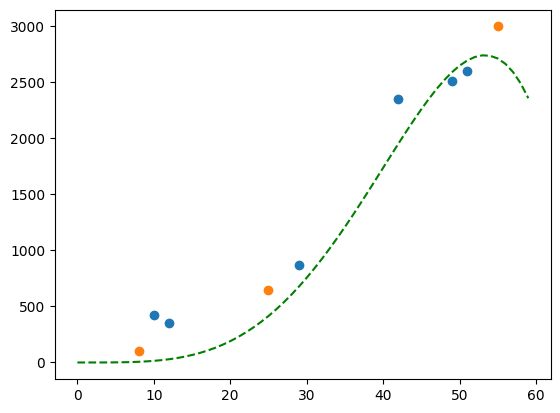

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

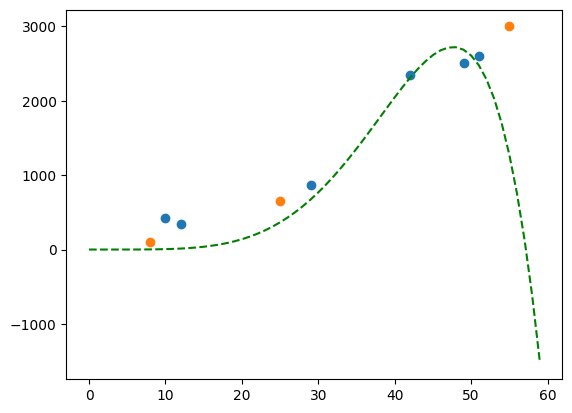

<IPython.core.display.Javascript object>

In [ ]:
epochs = [5000, 10000, 20000, 100000, 1000000, 2000000]
eps    = [1e-6,  1e-7, 1e-10,  1e-14,   1e-17,   1e-20]

tb = widgets.TabBar([str(i+1) for i in range(6)], location='top')

for p in range(6):
  with tb.output_to(p):
    w = train(x0, y0, p+1, epochs[p], eps[p])
    x_est = []
    y_est = []
    for x in range(60):
      x_est.append(x)
      y_est.append(transform_value(x, p+1)@w)

    plt.plot(x_est, y_est, 'g--')
    plt.scatter(x0, y0)
    plt.scatter(x0_test, y0_test)

    plt.show()